In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [45]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

  
# Set DataFrame as the Stock Ticker
adobe = DataReader("ADBE", 'yahoo', start, end)

In [46]:
adobe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-26,212.350006,209.259995,211.289993,212.149994,2418700,212.149994
2018-02-27,212.759995,208.250000,211.990005,208.820007,2330800,208.820007
2018-02-28,213.440002,209.100006,210.690002,209.130005,2356900,209.130005
2018-03-01,210.679993,204.449997,210.320007,206.029999,2632200,206.029999
2018-03-02,210.210007,201.759995,203.960007,209.789993,2624700,209.789993
...,...,...,...,...,...,...
2021-02-19,488.649994,476.100006,487.160004,479.119995,2718600,479.119995
2021-02-22,472.100006,466.660004,470.480011,467.329987,2509200,467.329987
2021-02-23,471.440002,450.119995,461.019989,467.799988,4163500,467.799988


In [47]:
adobe["returns"] = adobe["Adj Close"].pct_change(1)*100

In [48]:
adobe["sq_returns"]  = adobe["returns"].mul(adobe.returns)

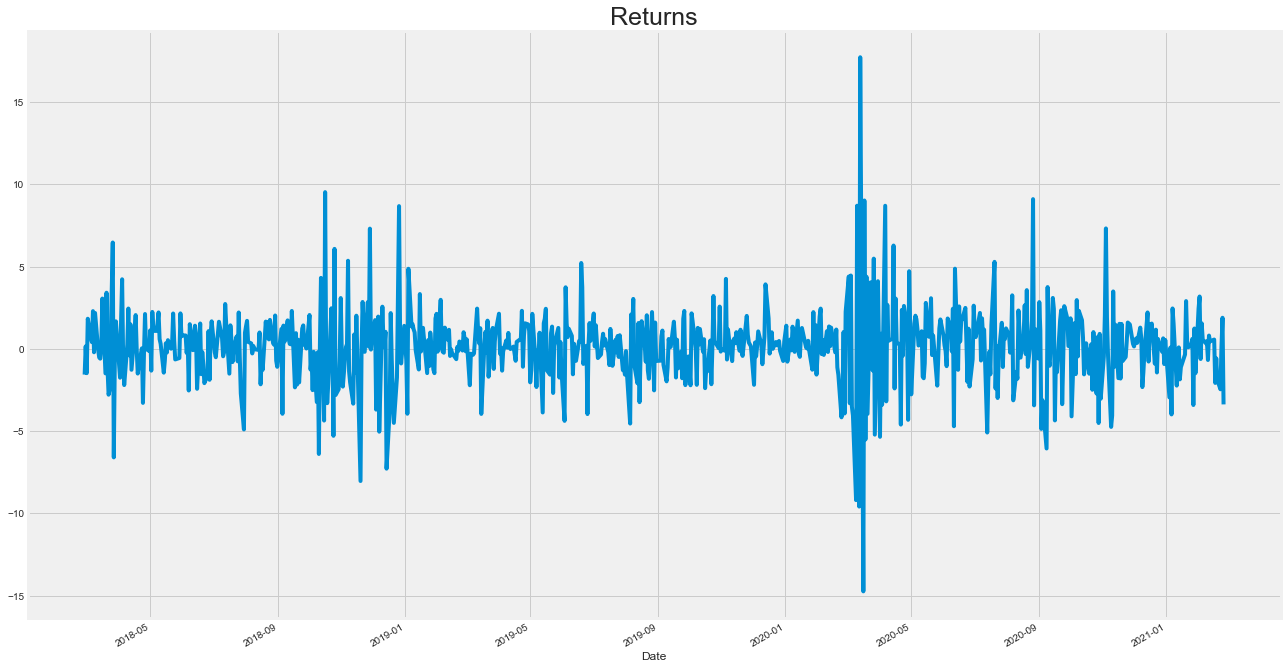

In [49]:
adobe.returns.plot(figsize=(20,12))
plt.title("Returns", size= 25)
plt.show()

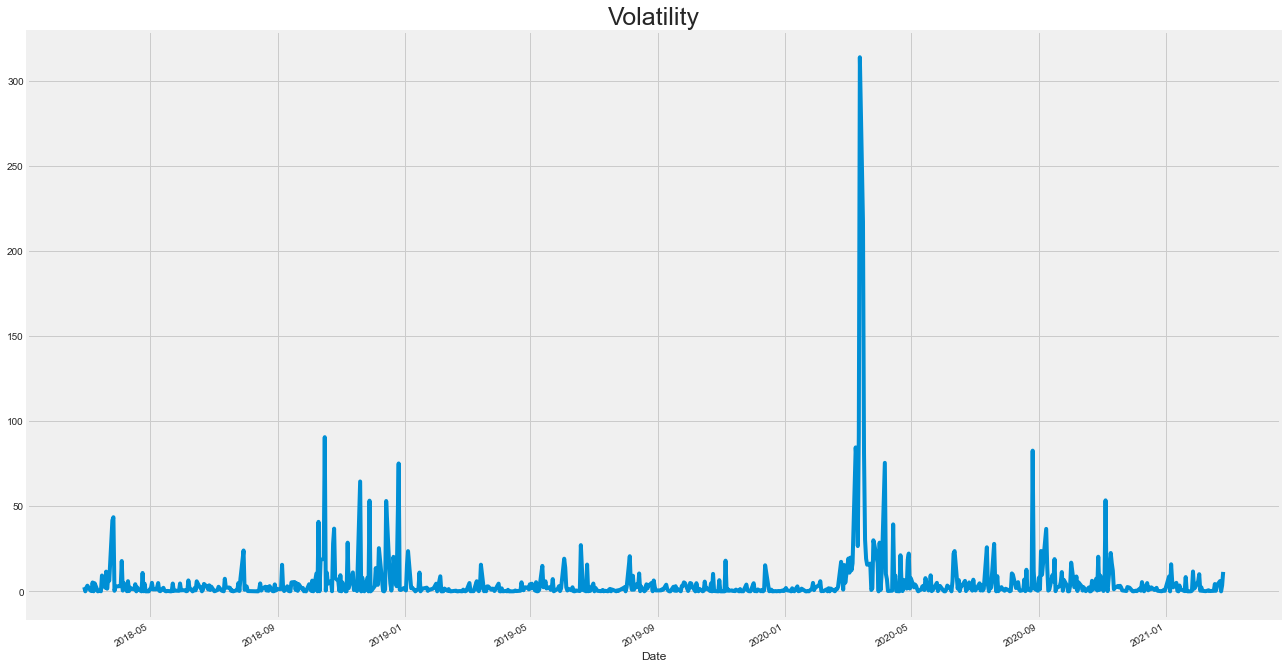

In [50]:
adobe.sq_returns.plot(figsize=(20,12))
plt.title("Volatility", size= 25)
plt.show()

In [51]:
import statsmodels.api as sm

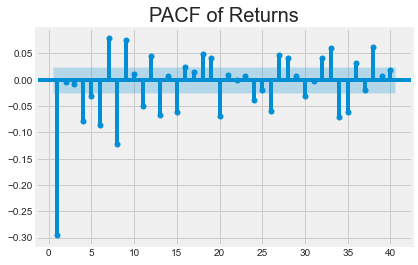

In [52]:
sm.graphics.tsa.plot_pacf(adobe.returns[1:], lags=40, alpha=0.5, zero=False, method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

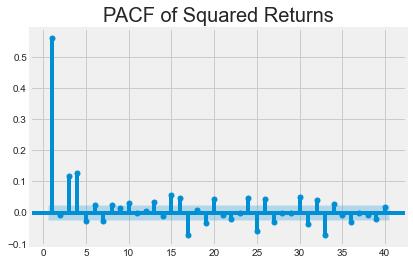

In [53]:
sm.graphics.tsa.plot_pacf(adobe.sq_returns[1:], lags=40, alpha=0.5, zero=False, method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [6]:
from arch import arch_model

In [55]:
model_arch_1 = arch_model(adobe.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13464413495.569206
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4203.29057247177
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1930.3457721216128
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1844.9073030298546
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1574.46161869748
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1574.8531017170606
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1574.4236609064478
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1574.417959097058
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1574.4179428439666
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1574.417942844136
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1574.4179428439666
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1574.42
Distribution:                  Normal   AIC:                           3156.84
Method:            Maximum Likelihood   BIC:                           3175.34
                                        No. Observations:                  755
Date:                Thu, Feb 25 2021   Df Residuals:                      751
Time:                        16:37:09   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1717  6.000e-02      2.862  4.215e-03 [5.410e-02,  0.289]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2205  7.518e-02      2.933  3.356e-03 [7.316e-02,  0.368]
alpha[1]       0.1668  3.452e-02      4.833  1.342e-06 [9.919e-02,  0.234]
beta[1]        0.7937  3.619e-02     21.929 1.375e-106   [  0.723,  0.865]
==========================================================================

Covariance estimator: robust
"""

# ARCH(1) Model

In [56]:
model_arch_1 = arch_model(adobe.returns[1:], mean = "Constant", vol = "ARCH", p = 1) # p is the order of the model
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9324.923243412839
Iteration:      2,   Func. Count:     11,   Neg. LLF: 2084.5075457892017
Iteration:      3,   Func. Count:     16,   Neg. LLF: 1724.9802246269655
Iteration:      4,   Func. Count:     21,   Neg. LLF: 1628.4353617040138
Iteration:      5,   Func. Count:     26,   Neg. LLF: 1627.9869889777942
Iteration:      6,   Func. Count:     30,   Neg. LLF: 1627.9869583215789
Iteration:      7,   Func. Count:     33,   Neg. LLF: 1627.986958321575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1627.9869583215789
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1627.99
Distribution:                  Normal   AIC:                           3261.97
Method:            Maximum Likelihood   BIC:                           3275.85
                                        No. Observations:                  755
Date:                Thu, Feb 25 2021   Df Residuals:                      752
Time:                        16:45:49   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1597  6.894e-02      2.317  2.050e-02 [2.462e-02,  0.295]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.2971      0.317     10.399  2.508e-25 [  2.676,  3.919]
alpha[1]       0.3291  7.316e-02      4.498  6.847e-06 [  0.186,  0.472]
========================================================================

Covariance estimator: robust
"""

In [57]:
model_arch_2 = arch_model(adobe.returns[1:], mean = "Constant", vol = "ARCH", p = 2) # p is the order of the model
results_arch_2 = model_arch_2.fit()
results_arch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5439844207.067104
Iteration:      2,   Func. Count:     13,   Neg. LLF: 422673475.87736356
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1723.6925422138252
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1630.9047636327355
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1614.2111749293667
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1614.0652353159924
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1614.0652353160283
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1614.0652353159924
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1614.07
Distribution:                  Normal   AIC:                           3236.13
Method:            Maximum Likelihood   BIC:                           3254.64
                                        No. Observations:                  755
Date:                Thu, Feb 25 2021   Df Residuals:                      751
Time:                        16:59:02   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1566  6.716e-02      2.331  1.974e-02 [2.493e-02,  0.288]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.6194      0.348      7.533  4.950e-14   [  1.938,  3.301]
alpha[1]       0.2473  7.359e-02      3.360  7.792e-04   [  0.103,  0.391]
alpha[2]       0.2402  8.684e-02      2.766  5.676e-03 [6.999e-02,  0.410]
==========================================================================

Covariance estimator: robust
"""